# <font color = green>Image Classification using Convolution Nural Network(CNN)</font>


### <font color = orange>click below link to redirect to the perticular Article</font>

1. [Importing the Package](#Importing-the-Package)
2. [Segritation the Data for the training and validation](#Segritation-the-Data-for-the-training-and-validation)
3. [Normalizing and Applying the filters](#Normalizing-and-Applying-the-filters)
4. [compling the Model](#compling-the-Model)
    
5. [Image Argumentation](#Image-Argumentation)
6. [Labling the Data](#Labling-the-Data)
7. [Visulazing the Data](#Visulazing-the-Data)
8. [Training the Model](#Training-the-Model)
9. [Visulazing the Training process](#Visulazing-the-Training-process)
10. [Let's See the Testing Data](#Let's-See-the-Testing-Data)

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')


### Importing the Package

In [2]:
# Code source : https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
# Image Source: https://www.tensorflow.org/datasets/catalog/cats_vs_dogs 
# Direct Image Source: https://www.microsoft.com/en-us/download/details.aspx?id=54765
#import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import backend as k
import numpy as np
from os import listdir
from os.path import isfile, join


### <font color = brown>Segritation the Data for the training and validation</font>

In [3]:
img_width = 200
img_height = 200

train_data_dir = r'image_data/training'
validation_data_dir = r'image_data/validation'
train_samples = 120
validation_samples = 30
epochs = 5
batch_size = 5

# Check for TensorFlow or Thieno
#tf.keras.set
if k.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

### <font color = brown>Normalizing and Applying the filters</font>

In [4]:
model = tf.keras.models.Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows sizea
model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(32, kernel_size= (3, 3), activation='relu'))
#model.add(Activation('relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(32, kernel_size= (3, 3), activation='relu'))
#model.add(Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3),activation='relu'))
#model.add(Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3),activation='relu'))
#model.add(Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(tf.keras.layers.Dense(64,activation='relu'))
#model.add(Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
#model.add(Activation('sigmoid'))

## <font color = brown>compling the Model</font>

In [5]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
# Data Augmentation is a method of artificially creating a new dataset for training from 
# the existing training dataset to improve the performance of deep learning neural network 
# with the amount of data available. It is a form of regularization which makes our model generalize better 
# than before.

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

## <font color = brown>Image Argumentation</font>

In [7]:
# this is the augmentation configuration we will use for testing:
# only rescaling, avoiding having same training and validation data.Ma
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 205 images belonging to 2 classes.


## <font color = brown>Labling the Data</font>

In [9]:
print(train_generator.class_indices)

{'Cat': 0, 'Dog': 1}


In [10]:
imgs, labels = next(train_generator)

In [11]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

## <font color = brown>Visulazing the Data</font>

5
0.0


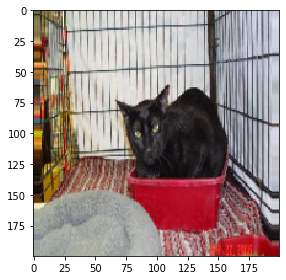

1.0


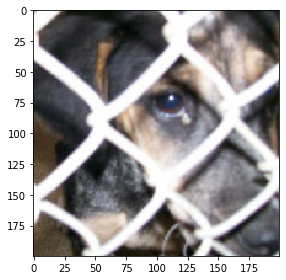

0.0


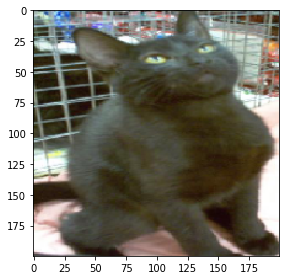

1.0


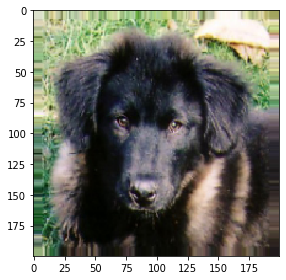

1.0


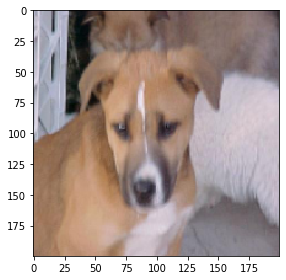

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

## <font color = brown>Training the Model</font>

In [13]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 108 images belonging to 2 classes.


In [14]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples//batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_samples//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
24/24 [==============================] - 7s 286ms/step - loss: 6.3578e-08 - accuracy: 0.4583 - val_loss: 5.9605e-08 - val_accuracy: 0.3333
Epoch 2/5
24/24 [==============================] - 7s 292ms/step - loss: 5.2651e-08 - accuracy: 0.4250 - val_loss: 5.9605e-08 - val_accuracy: 0.6000
Epoch 3/5
24/24 [==============================] - 8s 325ms/step - loss: 6.5565e-08 - accuracy: 0.4583 - val_loss: 5.1657e-08 - val_accuracy: 0.5667
Epoch 4/5
24/24 [==============================] - 8s 318ms/step - loss: 5.9605e-08 - accuracy: 0.5583 - val_loss: 6.8120e-08 - val_accuracy: 0.6071
Epoch 5/5
24/24 [==============================] - 7s 304ms/step - loss: 5.6624e-08 - accuracy: 0.5250 - val_loss: 5.5631e-08 - val_accuracy: 0.5333


## <font color = brown>Visulazing the Training process</font>

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


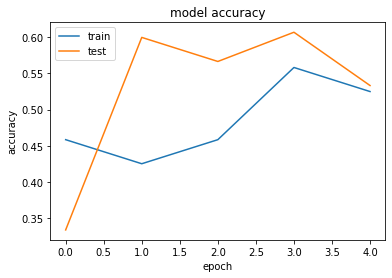

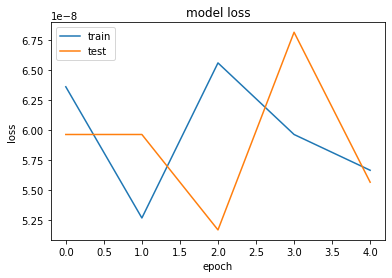

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## <font color = brown>Let's See the Testing Data</font>

In [16]:

## Now Predict
predict_dir_path=r'image_data/test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['310.jpg', '2994.jpg', '3285.jpg', '236.jpg', '234.jpg', '3111.jpg', '2512.jpg', '2658.jpg']


## <font color = brown>Classify the unknown data</font>

In [17]:
# predicting images
#from tf.keras.preprocessing import image
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = tf.keras.preprocessing.image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
310.jpg: dog
2994.jpg: dog
3285.jpg: cat
236.jpg: dog
234.jpg: dog
3111.jpg: dog
2512.jpg: dog
2658.jpg: cat
Total Dogs : 6
Total Cats : 2
